In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
# Run src/data/combine_annotations.py first to generate the combined annotations file

### Set frame names in lower case

In [3]:
frames = ["Economic","Capacity and resources","Morality","Fairness and equality","Legality, constitutionality and jurisprudence","Policy prescription and evaluation","Crime and punishment","Security and defense","Health and safety","Quality of life","Cultural identity","Public opinion","Political","External regulation and reputation","Other"]
frames = [f.lower() for f in frames]

### Get path of the directory vision and text (model) annotated files are stored

In [4]:
analysis_path = Path('/projects/frame_align/data/annotated/analysis')
text_analysis_path = analysis_path / 'text'
vision_analysis_path = analysis_path / 'vision'

### Combine the vision and text annotated files into a single file

In [5]:
combined_df = pd.read_csv(analysis_path/'combined_annotations.csv')

print(combined_df.shape)

uuids = combined_df['text_id'].unique()
len(uuids)


(111405, 31)


111405

### Filter the data to get rows which have required frames (in both vision and text)

In [6]:
combined_df['text_frame_name'] = combined_df['text_frame_name'].str.lower()
combined_df['vision_frame-name'] = combined_df['vision_frame-name'].str.lower()

text_valid = combined_df['text_frame_name'].isin(frames)
vision_valid = combined_df['vision_frame-name'].isin(frames)
intersection = text_valid & vision_valid
combined_df = combined_df[intersection]
print(combined_df.shape)

(103142, 31)


### Filter original news data to get rows (with uuids) which have been annotated

In [7]:
annotated_articles = []
data_dir = Path('/projects/frame_align/data/raw/2023-2024/')
for month_dir in data_dir.iterdir():
    if not month_dir.is_dir():
        continue
    df = pd.read_csv(month_dir/"datawithtopiclabels.csv")
    df = df[df['id'].isin(uuids)]
    annotated_articles.append(df)
annotated_articles = pd.concat(annotated_articles)
annotated_articles['month'].value_counts()
# annotated_articles.to_csv(analysis_path.parent.parent / "srishti-analysis"/'annotated_articles.csv', index=False)

month
2023-07-01_2023-07-31    20788
2023-09-01_2023-09-30    20262
2023-08-01_2023-08-31    18374
2023-05-01_2023-05-31    18267
2023-06-01_2023-06-30    12753
2023-11-01_2023-11-30    10332
2023-10-01_2023-10-31     9715
2023-12-01_2023-12-31      914
Name: count, dtype: int64

### Save the filtered data to a new file

In [8]:
# annotated_articles.to_csv(analysis_path/'_srishti_annotated_articles.csv', index=False)

In [9]:
# annotated_articles = pd.read_csv(analysis_path/'_srishti_annotated_articles.csv')

View first few line

In [10]:
annotated_articles.head(2)

,topic,auto_topic_label,id,authors,date_download,date_modify,date_publish,description,filename,image_url,language,localpath,maintext,source_domain,title,title_page,title_rss,url,month,topic_label
11900,-1,police_new_man_woman_says_year_school_old_arre...,d41fe6f9-2313-4f94-a8e2-82915987fa37,['Mauricio Maldonado'],2023-11-15 05:20:58+00:00,NaN,2023-11-14 23:25:18,Lauderhill police detectives are investigating...,https%3A%2F%2Fwww.cbsnews.com%2Fmiami%2Fnews%2...,https://assets2.cbsnewsstatic.com/hub/i/r/2023...,en,NaN,MIAMI - Lauderhill police detectives are inves...,www.cbsnews.com,Police: Juvenile shot in the neck in Lauderhill,NaN,NaN,https://www.cbsnews.com/miami/news/police-juve...,2023-11-01_2023-11-30,Crime
11901,-1,police_new_man_woman_says_year_school_old_arre...,c9c538db-7ee1-4467-8351-6bd74b844a3b,"['Kcal-News Staff', 'The Kcal News Staff Is A ...",2023-11-29 17:11:42+00:00,NaN,2023-11-29 08:57:05,The ordinance is meant to curb the rental of p...,https%3A%2F%2Fwww.cbsnews.com%2Flosangeles%2Fn...,https://assets2.cbsnewsstatic.com/hub/i/r/2022...,en,NaN,The Los Angeles City Council approved a draft ...,www.cbsnews.com,LA City Council moves forward with policy requ...,NaN,NaN,https://www.cbsnews.com/losangeles/news/la-cit...,2023-11-01_2023-11-30,Crime


View columns in original news data and filtered data

In [11]:
print(combined_df.columns)
print("*"*50)
print(annotated_articles.columns)

Index(['text_topic', 'text_topic_justification', 'text_summary',
       'text_entity_name', 'text_justification_entity_sentiment',
       'text_entity_sentiment', 'text_frame_justification', 'text_frame_id',
       'text_frame_name', 'text_tone', 'text_justification_tone',
       'text_issue_frame', 'text_issue_frame_justification', 'text_id',
       'vision_caption', 'vision_main-actor', 'vision_sentiment',
       'vision_sentiment-justification', 'vision_facial-expression',
       'vision_facial-expression-justification', 'vision_perceivable-gender',
       'vision_perceivable-gender-justification', 'vision_symbolic-object',
       'vision_symbolic-meaning', 'vision_symbolic-meaning-explanation',
       'vision_frame-id', 'vision_frame-name', 'vision_frame-justification',
       'vision_image_url', 'vision_title', 'vision_uuid'],
      dtype='object')
**************************************************
Index(['topic', 'auto_topic_label', 'id', 'authors', 'date_download',
       'date_

### Find all common column
- Sanity check to ensure no duplication of columns when merging the data
- There should be no common columns between the two dataframes

In [12]:
# find common columns , exclude 'id' column
common_col = list(set(annotated_articles.columns) & set(combined_df.columns))
common_col


[]

In [13]:
# Drop common columns from annotated_articles and merge with combined_df
annotated_articles_df = annotated_articles.drop(columns=common_col)

# Merge on 'text_id' (uuid for text data) and 'id' (uuid for annotated articles)
merged_combined_df = combined_df.merge(annotated_articles_df, left_on='text_id', right_on='id', how='left')

# make text_id as first column for better readability
merged_combined_df = merged_combined_df[['text_id'] + [col for col in merged_combined_df.columns if col != 'text_id']]
merged_combined_df.head(2)

,text_id,text_topic,text_topic_justification,text_summary,text_entity_name,text_justification_entity_sentiment,text_entity_sentiment,text_frame_justification,text_frame_id,text_frame_name,...,language,localpath,maintext,source_domain,title,title_page,title_rss,url,month,topic_label
0,fd2357e4-f19e-429d-b9d1-4261661c0c0f,Cosy Crime,The article discusses the expected trend of 'c...,The article discusses the expected rise of 'co...,Cosy crime genre,The article discusses the cosy crime genre as ...,positive,The article discusses the trend of 'cosy crime...,11,cultural identity,...,en,NaN,A sleuth in search of clues to putting on a su...,www.theguardian.com,Cosy crime dramas are killer tickets at the Ed...,NaN,NaN,https://www.theguardian.com/stage/2023/aug/06/...,2023-08-01_2023-08-31,Crime
1,ca6c063d-16af-43f2-b785-7b74c92a58e2,Sports,The article discusses the transfer of a footba...,Sheffield United have completed the signing of...,Cameron Archer,Archer's transfer to Sheffield United on a sig...,positive,The article primarily focuses on the financial...,1,economic,...,en,NaN,Last updated on .From the section Sheff Utd\nC...,www.bbc.com,Cameron Archer: Sheff Utd sign England Under-2...,NaN,NaN,https://www.bbc.com/sport/football/66595410,2023-08-01_2023-08-31,Crime


View all column in the merged data (filtred news merged to their annotated data)

In [14]:
merged_combined_df.columns

Index(['text_id', 'text_topic', 'text_topic_justification', 'text_summary',
       'text_entity_name', 'text_justification_entity_sentiment',
       'text_entity_sentiment', 'text_frame_justification', 'text_frame_id',
       'text_frame_name', 'text_tone', 'text_justification_tone',
       'text_issue_frame', 'text_issue_frame_justification', 'vision_caption',
       'vision_main-actor', 'vision_sentiment',
       'vision_sentiment-justification', 'vision_facial-expression',
       'vision_facial-expression-justification', 'vision_perceivable-gender',
       'vision_perceivable-gender-justification', 'vision_symbolic-object',
       'vision_symbolic-meaning', 'vision_symbolic-meaning-explanation',
       'vision_frame-id', 'vision_frame-name', 'vision_frame-justification',
       'vision_image_url', 'vision_title', 'vision_uuid', 'topic',
       'auto_topic_label', 'id', 'authors', 'date_download', 'date_modify',
       'date_publish', 'description', 'filename', 'image_url', 'language

In [15]:
print(f" No. of topics: {len(merged_combined_df['topic_label'].unique())}")
print(f"Topics: {merged_combined_df['topic_label'].unique()}")

 No. of topics: 11
Topics: ['Crime' 'no_topic' 'Wildlife' 'Sports' 'Politics' 'Immigration'
 'Conflict' 'Military' 'Technology' 'Business' 'Royalty']


### Count number of articles per news source

In [16]:
merged_combined_df['source_domain'].value_counts()

source_domain
www.cbsnews.com                    29833
www.bbc.com                        16336
apnews.com                          8272
www.forbes.com                      6477
www.theguardian.com                 6421
nypost.com                          5291
www.foxnews.com                     3310
www.huffpost.com                    2711
www.breitbart.com                   2666
www.axios.com                       2584
www.nbcnews.com                     2455
www.newsweek.com                    2179
www.reuters.com                     2081
dailycaller.com                     2041
www.insider.com                     1920
www.usatoday.com                    1474
www.newsmax.com                     1245
www.washingtontimes.com              878
www.politico.com                     782
time.com                             725
www.foxbusiness.com                  575
thehill.com                          503
www.msnbc.com                        486
www.oann.com                         397
sl

In [17]:
merged_combined_df.columns

Index(['text_id', 'text_topic', 'text_topic_justification', 'text_summary',
       'text_entity_name', 'text_justification_entity_sentiment',
       'text_entity_sentiment', 'text_frame_justification', 'text_frame_id',
       'text_frame_name', 'text_tone', 'text_justification_tone',
       'text_issue_frame', 'text_issue_frame_justification', 'vision_caption',
       'vision_main-actor', 'vision_sentiment',
       'vision_sentiment-justification', 'vision_facial-expression',
       'vision_facial-expression-justification', 'vision_perceivable-gender',
       'vision_perceivable-gender-justification', 'vision_symbolic-object',
       'vision_symbolic-meaning', 'vision_symbolic-meaning-explanation',
       'vision_frame-id', 'vision_frame-name', 'vision_frame-justification',
       'vision_image_url', 'vision_title', 'vision_uuid', 'topic',
       'auto_topic_label', 'id', 'authors', 'date_download', 'date_modify',
       'date_publish', 'description', 'filename', 'image_url', 'language

Filter image data

In [18]:
# image_paths = ["/projects/frame_align/data/ img_data", "/projects/frame_align/data/news_img_data"]

# # make a list of paths to .png/.jpg files in the image directories as dict where 
# # key =  image path.split('/')[-1].strip('.png') and value = image path
# image_dict = {}

# for idx, image_path in enumerate(image_paths):
#     for img in Path(image_path).rglob('*.png') or Path(image_path).rglob('*.jpg'):
#         image_dict[img.name.split('.')[0]] = img

In [19]:
# # save as pickle
# import pickle
# with open(analysis_path.parent.parent / "srishti-analysis"/'image_dict.pkl', 'wb') as f:
#     pickle.dump(image_dict, f)

In [20]:
from tqdm import tqdm
from pathlib import Path

img_path1 = Path("/projects/frame_align/data/img_data/")
downloaded_img_1= {}
for dir in img_path1.iterdir():
    downloaded_img_dir = dir/"correct_downloaded_imgs/"
    for img in tqdm(downloaded_img_dir.iterdir()):
        downloaded_img_1[img.name.split('.')[0]] = img.stat().st_size

    print(f"dir: {dir}, len: {len(downloaded_img_1)}")

38530it [00:39, 967.58it/s]


dir: /projects/frame_align/data/img_data/2023-11-01_2023-11-30, len: 38530


24812it [00:24, 993.16it/s]


dir: /projects/frame_align/data/img_data/2023-06-01_2023-06-30, len: 63342


40821it [00:45, 890.20it/s] 


dir: /projects/frame_align/data/img_data/2024-01-01_2024-01-31, len: 104163


34942it [00:40, 855.04it/s]


dir: /projects/frame_align/data/img_data/2024-03-01_2024-03-31, len: 139105


40424it [00:43, 921.01it/s]


dir: /projects/frame_align/data/img_data/2023-08-01_2023-08-31, len: 179529


37074it [00:43, 850.38it/s]


dir: /projects/frame_align/data/img_data/2024-02-01_2024-02-29, len: 216603


34864it [00:37, 936.70it/s]


dir: /projects/frame_align/data/img_data/2024-04-01_2024-04-30, len: 251467


55647it [01:00, 915.21it/s]


dir: /projects/frame_align/data/img_data/2023-05-01_2023-05-31, len: 307114


36545it [00:38, 942.72it/s]


dir: /projects/frame_align/data/img_data/2023-10-01_2023-10-31, len: 343659


34856it [00:35, 993.66it/s] 


dir: /projects/frame_align/data/img_data/2023-12-01_2023-12-31, len: 378515


31114it [00:32, 956.02it/s]


dir: /projects/frame_align/data/img_data/2023-07-01_2023-07-31, len: 409629


40203it [00:42, 938.63it/s]

dir: /projects/frame_align/data/img_data/2023-09-01_2023-09-30, len: 449832


In [21]:
for key, value in downloaded_img_1.items():
    print(key, value)
    break

978803d9-e5e7-4002-95a4-f6d245903eb8 52506


In [22]:
img_path2 = Path("/projects/frame_align/data/news_img_data/")
downloaded_img_2= {}
for dir in img_path2.iterdir():
    # .pkl files are not dir
    if '.pkl' in str(dir):
        continue
    for img in tqdm(dir.iterdir()):
        downloaded_img_2[img.name.split('.')[0]] = img.stat().st_size


4it [00:00, 1150.39it/s]
0it [00:00, ?it/s]

95873it [01:48, 879.71it/s]
13354it [00:13, 1000.05it/s]
18896it [00:19, 952.64it/s]
82346it [01:33, 880.12it/s]
14808it [00:14, 1003.21it/s]
16690it [00:16, 1005.22it/s]
75525it [01:19, 945.00it/s] 
24719it [00:24, 1020.09it/s]
14640it [00:13, 1077.64it/s]
85311it [01:30, 945.52it/s] 
70382it [01:12, 964.45it/s] 


In [23]:
for key, value in downloaded_img_2.items():
    print(key, value)
    break

d48aa163-feb8-44c5-b3a8-21fe0a78566c 59964


In [25]:
import pandas as pd
downloaded_images = {**downloaded_img_1, **downloaded_img_2}


Before filtering: 962380


top percentile: 0.8, bottom percentile: 0.1
Pre filtering:  962380 Post filtering:  673675


Text(0.5, 1.0, 'Histogram of Image Sizes')

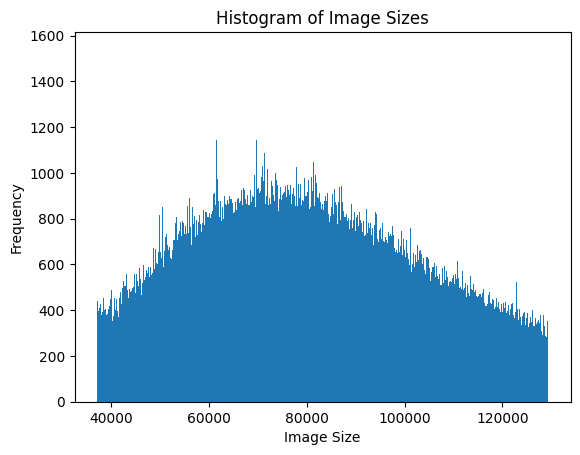

In [48]:
# # plot histogram of image sizes
# filter top % and bottom % of images before plot
top_percentile = 0.80
bottom_percentile = 0.10
quantile_top = pd.Series(list(downloaded_images.values())).quantile(top_percentile)
quantile_bottom = pd.Series(list(downloaded_images.values())).quantile(bottom_percentile)
filtered_images = {k: v for k, v in downloaded_images.items() if v <= quantile_top and v >= quantile_bottom}
print(f"top percentile: {top_percentile}, bottom percentile: {bottom_percentile}")
print("Pre filtering: ", len(downloaded_images), "Post filtering: ", len(filtered_images))

plt.hist(filtered_images.values(), bins=1000)
plt.xlabel('Image Size')
plt.ylabel('Frequency')
plt.title('Histogram of Image Sizes')


In [49]:
# print min and max size of images
print(f" Before filtering: min size: {min(downloaded_images.values())}, max size: {max(downloaded_images.values())}, median size: {pd.Series(list(downloaded_images.values())).median()}")
print(f" After filtering: min size: {min(filtered_images.values())}, max size: {max(filtered_images.values())}, median size: {pd.Series(list(filtered_images.values())).median()}")

 Before filtering: min size: 954, max size: 11540663, median size: 83814.0
 After filtering: min size: 37075, max size: 129355, median size: 78888.0


In [36]:
# print(f"Before filtering: {len(downloaded_images)}")

# # filter top 20% and bottom 20% of images
# quantile_top20 = pd.Series(list(downloaded_images.values())).quantile(0.80)
# quantile_bottom20 = pd.Series(list(downloaded_images.values())).quantile(0.20)
# quantile_bottom5 = pd.Series(list(downloaded_images.values())).quantile(0.20)

# print(f"Quantile 95: {quantile_95}")
# print(f"Quantile 99: {quantile_98}")

# # keep all keys with value < 5000 and > quantile_95
# filtered_downloaded_images = {k:v for k,v in downloaded_images.items() if v > quantile_80}
# print(f"After filtering: {len(filtered_downloaded_images)}")

Before filtering: 962380
Quantile 95: 174968.0
Quantile 99: 517422.2999999989
After filtering: 192472


 Plot random 3 image samples from each 20k 

In [ ]:
### Plot random 3 samples from each 20k filtered images
import random

random.seed(42)
# for every 20k samples in the dict, plot 3 random samples
for i in range(0, len(filtered_images), 20000):
    print(f"Plotting {i} to {i+3} samples")
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    for j, (key, value) in enumerate(list(filtered_images.items())[i:i+3]):
        img_path = image_dict[key]
        img = plt.imread(img_path)
        ax[j].imshow(img)
        ax[j].set_title(f"{key} - {value}")
        ax[j].axis('off')
    plt.show()

----------------------------------------------------------------

### TO DO: Filter the uuids from merged data



In [53]:
filtered_images ?

SyntaxError: invalid syntax (732371276.py, line 1)

Filter length texts

In [ ]:
merged_combined_df['maintext'] = merged_combined_df['maintext'].astype(str)
merged_combined_df['text_length'] = merged_combined_df['maintext'].apply(lambda x: len(x))

lower_quantile = merged_combined_df['text_length'].quantile(0.05)
upper_quantile = merged_combined_df['text_length'].quantile(0.95)

merged_combined_df = merged_combined_df[(merged_combined_df['text_length'] >= lower_quantile) & (merged_combined_df['text_length'] <= upper_quantile)]
merged_combined_df.shape

In [132]:
# left_hosts = ['alternet.org', 'editor.cnn.com', 'democracynow.org', 'dailybeast.com', 'huffpost.com', 'theintercept.com','jacobin.com', 'motherjones.com', 'newyorker.com', 'slate.com',   'msnbc.com', 'vox.com']
# left_lean_hosts = ['abcnews.com','apnews.com', 'theatlantic.com', 'bloomberg.com', 'cbsnews.com', 'insider.com', 'nbcnews.com', 'thenytimes.com', 'npr.com', 'politico.com', 'propublica.org', 'time.com', 'washingtonpost.com', 'yahoonews.com','usatoday.com', 'theguardian.com']
# center_hosts = ['axios.com', 'bbc.com', 'forbes.com', 'newsweek.com', 'reuters.com', 'realclearpolitics.com', 'thehill.com']
# right_lean_hosts = ['thedispatch.com', 'theepochtimes.com', 'foxbusiness.com', 'ijr.com', 'nypost.com', 'thepostmillennial.com', 'washingtonexaminer.com', 'washingtontimes.com']
# right_hosts = ['theamericanconservative.com', 'theamericanspectator.com', 'breitbart.com', 'dailycaller.com', 'dailywire.com', 'dailymail.com', 'foxnews.com', 'newsmax.com', 'oann.com', 'thefederalist.com']


In [ ]:
merged_combined_df.to_csv(analysis_path.parent.parent / "srishti-analysis"/'merged_combined_annotations.csv', index=False)
print(f"Saved merged_combined_annotations.csv to {analysis_path.parent.parent / 'srishti-analysis'}")

In [ ]:
# for each month, get unique frame. for each frame, gte 2000 articles

months = merged_combined_df['month'].unique()
for month in months:
    month_df = merged_combined_df[merged_combined_df['month'] == month]
    vision_frame_counts = month_df['text_frame_name'].value_counts()
    text_frame_counts = month_df['vision_frame-name'].value_counts()
    print(f"Month frame count: {month} - vision: {len(vision_frame_counts)}, text: {len(text_frame_counts)}")

In [125]:
# for each month, per text frame, get 2000 unique articles
sampled_df = pd.DataFrame()
for month in months:
    for frame in frames:
        month_df = merged_combined_df[(merged_combined_df['month'] == month) & (merged_combined_df['text_frame_name'] == frame)]
        if month_df.shape[0] >=18:
            month_df = month_df.sample(n=18, random_state=1)
        sampled_df = pd.concat([sampled_df, month_df])

In [126]:
# sampled_df.to_csv(analysis_path/'sampled_annotated_articles_srishti.csv', index=False)

In [127]:
sampled_df.to_csv(analysis_path.parent.parent / "srishti-analysis"/'sampled_annotated_articles.csv', index=False)

In [ ]:
frame_counts_pivot = sampled_df.pivot_table(index='month', columns='text_frame_name', values='text_id', aggfunc='count', fill_value=0)
frame_counts_pivot

